In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('laliga_matches.csv')
df.head()

,match_id,team1_name,team1_average_distance,team1_recovery_passes,team1_throw_in_passes,team1_free_kick_passes,team1_corner_passes,team1_goal_kick_passes,team1_interception_passes,team1_kick_off_passes,...,team2_avg_x_position_non_gk,team2_avg_links,team2_avg_pass_distance,team2_avg_backline_distance,team2_avg_front_three_distance,team2_avg_time_between_passes,team2_avg_passes_per_possession,team2_betti_0,team2_betti_1,match_outcome
0,69225,Barcelona,0.548764,0.099315,0.041096,0.032534,0.018836,0.008562,0.003425,0.001712,...,0.458763,7.071429,0.245051,0.420846,0.689028,3.686673,2.719298,1,54,team1_wins
1,69212,Barcelona,0.571302,0.045531,0.030354,0.028668,0.008432,0.003373,0.008432,0.003373,...,0.470242,9.928571,0.213755,0.420846,0.689028,3.356350,4.086538,1,67,team1_wins
2,69235,Málaga,0.627899,0.221477,0.107383,0.080537,0.003356,0.033557,0.013423,0.016779,...,0.520929,7.642857,0.218094,0.420846,0.689028,3.734753,2.647887,1,57,team2_wins
3,69232,Barcelona,0.533748,0.043210,0.029321,0.024691,0.009259,0.006173,0.003086,0.001543,...,0.501550,7.428571,0.236023,0.420846,0.689028,3.846556,3.346939,1,52,team1_wins
4,69216,Barcelona,0.595450,0.071082,0.029079,0.048465,0.008078,0.009693,0.001616,0.001616,...,0.483673,7.785714,0.263440,0.420846,0.689028,3.651864,2.962617,1,61,team1_wins


In [8]:
drop_columns = [
    "match_outcome",
    "match_id",
    "team1_name",
    "team2_name",
    "team1_most_advanced_player",
    "team2_most_advanced_player",
]
features = df.drop(columns=drop_columns)

label_encoder = LabelEncoder()
df['match_outcome'] = label_encoder.fit_transform(df['match_outcome'])
# One-hot encode the target variable
target = to_categorical(df['match_outcome'], num_classes=3) 

In [9]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Build the neural network model
dropout_rate = 0.1
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()


c:\Users\shrey\Anaconda3\envs\soccer_tda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,859 (22.89 KB)

 Trainable params: 5,635 (22.01 KB)

 Non-trainable params: 224 (896.00 B)

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3871 - loss: 1.3572 - val_accuracy: 0.5180 - val_loss: 0.9999
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5294 - loss: 1.0140 - val_accuracy: 0.6043 - val_loss: 0.9317
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5820 - loss: 0.9185 - val_accuracy: 0.6403 - val_loss: 0.8522
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 0.8274 - val_accuracy: 0.6619 - val_loss: 0.7813
Epoch 5/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6811 - loss: 0.7661 - val_accuracy: 0.6906 - val_loss: 0.7304
Epoch 6/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7290 - loss: 0.6802 - val_accuracy: 0.7266 - val_loss: 0.6739
Epoch 7/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.6724 - val_accuracy: 0.7194 - val_loss: 0.6546
Epoch 8/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7089 - loss: 0.6668 - val_accuracy: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4480 
Test Loss: 0.4547103941440582
Test Accuracy: 0.8218390941619873


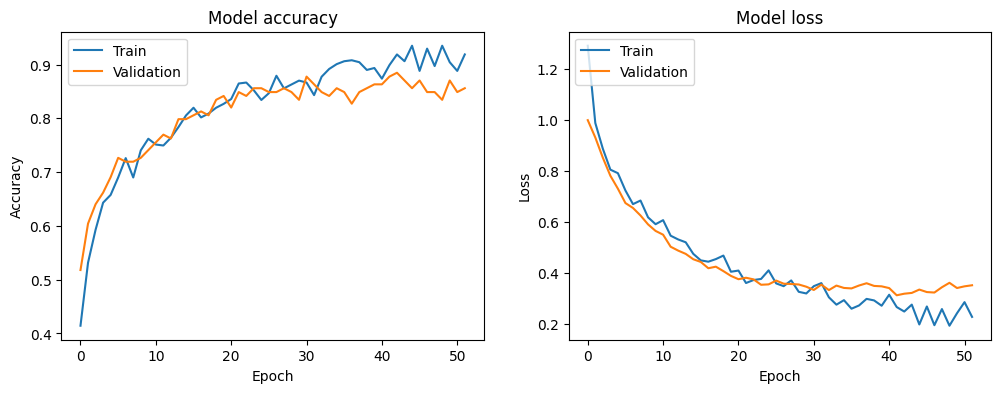

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [33]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_rate', values=[0.1, 0.2])))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_rate', values=[0.1, 0.2])))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_rate', values=[0.1, 0.2])))
    model.add(Dense(3, activation='softmax'))
    
    optimizer = tf.keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[0.001, 0.0001, 0.005]))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [34]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=100,
    factor=5,
    directory='hyperparam_tuning',
    project_name='soccer_nn'
)

# Print a summary of the search space
tuner.search_space_summary()


Search space summary
Default search space size: 2
dropout_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 0.005], 'ordered': True}


In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform the search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping],
             batch_size=tuner.oracle.hyperparameters.Choice('batch_size', values=[8, 16, 32]))
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal learning rate is {best_hps.get('learning_rate')},
the optimal dropout rate is {best_hps.get('dropout_rate')}, and the optimal batch size is {best_hps.get('batch_size')}.
""")


Trial 18 Complete [00h 00m 05s]
val_accuracy: 0.6546762585639954

Best val_accuracy So Far: 0.7913669347763062
Total elapsed time: 00h 01m 25s

The hyperparameter search is complete. The optimal learning rate is 0.005,
the optimal dropout rate is 0.2, and the optimal batch size is 8.



Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4175 - loss: 1.3738 - val_accuracy: 0.6115 - val_loss: 0.8998
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6331 - loss: 0.9137 - val_accuracy: 0.6978 - val_loss: 0.6949
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6182 - loss: 0.8415 - val_accuracy: 0.7050 - val_loss: 0.6393
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.7402 - val_accuracy: 0.7482 - val_loss: 0.5596
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.7001 - val_accuracy: 0.7338 - val_loss: 0.5576
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.6885 - val_accuracy: 0.7698 - val_loss: 0.4921
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7556 - loss: 0.5630 - val_accuracy: 0.8201 - val_loss: 0.4505
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.5806 - val_accuracy: 0.

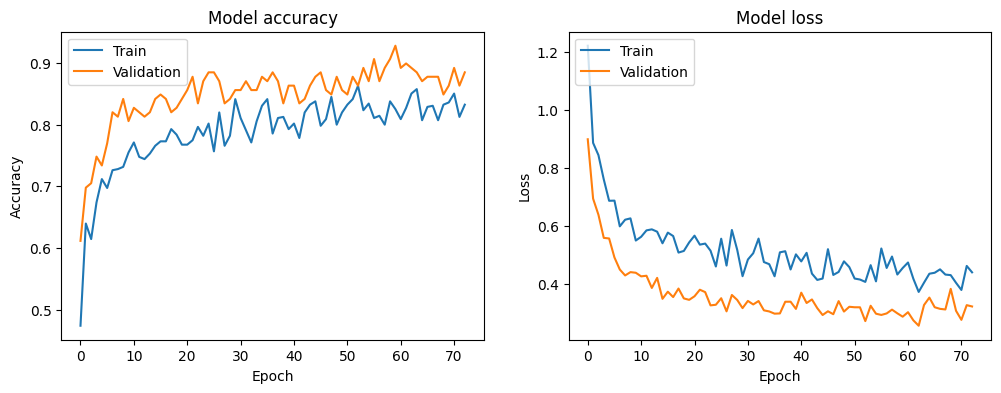

In [36]:
# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=1000, batch_size=best_hps.get('batch_size'), validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [37]:
# Extract the best training and validation accuracy from the history
best_train_accuracy = max(history.history['accuracy'])
best_val_accuracy = max(history.history['val_accuracy'])

print(f'Best Training Accuracy: {best_train_accuracy}')
print(f'Best Validation Accuracy: {best_val_accuracy}')

Best Training Accuracy: 0.8630630373954773
Best Validation Accuracy: 0.9280575513839722
